In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['flower_val'] = iris.target
df['flower_name'] = df['flower_val'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_val,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df_setosa = df[df.flower_val == 0]
df_versicolor = df[df.flower_val == 1]
df_virginica = df[df.flower_val == 2]

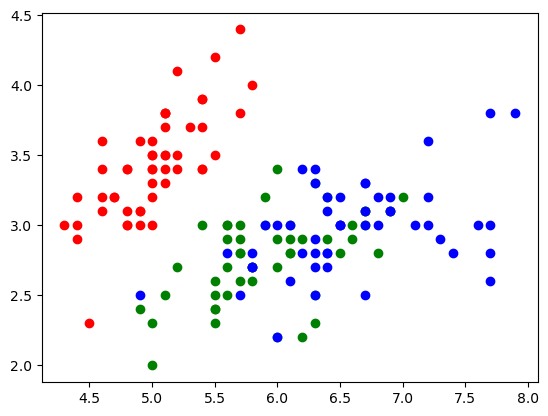

In [9]:
%matplotlib inline
plt.scatter(df_setosa['sepal length (cm)'], df_setosa['sepal width (cm)'], color = 'red')
plt.scatter(df_versicolor['sepal length (cm)'], df_versicolor['sepal width (cm)'], color = 'green')
plt.scatter(df_virginica['sepal length (cm)'], df_virginica['sepal width (cm)'], color = 'blue')

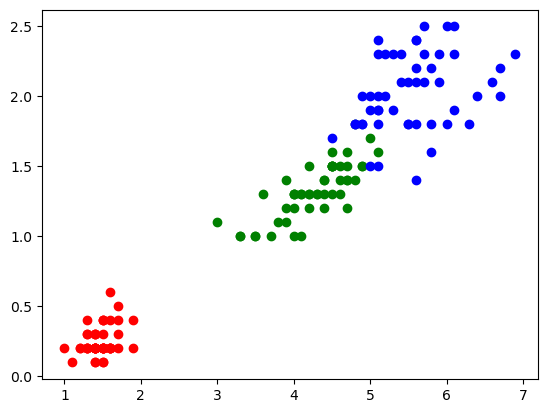

In [10]:
%matplotlib inline
plt.scatter(df_setosa['petal length (cm)'], df_setosa['petal width (cm)'], color = 'red')
plt.scatter(df_versicolor['petal length (cm)'], df_versicolor['petal width (cm)'], color = 'green')
plt.scatter(df_virginica['petal length (cm)'], df_virginica['petal width (cm)'], color = 'blue')

In [11]:
(x_train, x_test, y_train, y_test) = train_test_split(iris.data, iris.target, train_size = 0.8, random_state = 30)

In [12]:
len(x_train), len(x_test)

(120, 30)

In [27]:
model = RandomForestClassifier(n_estimators = 28)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=28)

In [28]:
model.score(x_test, y_test)

0.9666666666666667

In [29]:
y_predicted = model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix 
import seaborn as sn

In [37]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  9]], dtype=int64)

Text(8.222222222222223, 0.5, 'Truth')

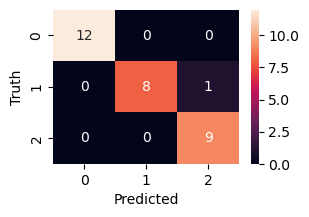

In [41]:
%matplotlib inline
plt.figure(figsize = (3, 2))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')